In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sb #extra, just to visualize the multi-class confusion matrix

## Handwritten Digit Recognition
### Modified National Institute of Standards and Technology (MNIST) Dataset
#### Download the data from [Kaggle](https://www.kaggle.com/oddrationale/mnist-in-csv)
There is a training set and a test set available in this dataset. Every row corresponds to a handwritten digit. The first column is named `label`, which is the true digit that was written ($0-9$).

For more information on this dataset, please see the [official page](http://yann.lecun.com/exdb/mnist/), which includes:
- "The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image."

Moreover, there are $28 \times 28$ predictors in the dataset. To understsand their meaning, we refer to the same page again:
- "The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image by computing the center of mass of the pixels, and translating the image so as to position this point at the center of the 28x28 field."

**Q1: Load the training and test sets as Pandas dataframes.**

In [11]:
train = pd.read_csv('mnist_train.csv')
test = pd.read_csv('mnist_test.csv')

In [12]:
print("Training set shape:", train.shape, "test set shape:", test.shape)

Training set shape: (60000, 785) test set shape: (10000, 785)


**Q2: Plot (with a histogram) the distribution of the digits in the training set. Report if there are missing values (if yes, drop such rows).**

In [172]:
x = sorted(pd.unique(train.label))
y = train['label'].value_counts()[x]
y


label
0    5923
1    6742
2    5958
3    6131
4    5842
5    5421
6    5918
7    6265
8    5851
9    5949
Name: count, dtype: int64

Text(0.5, 1.0, 'Histogram of Label Counts')

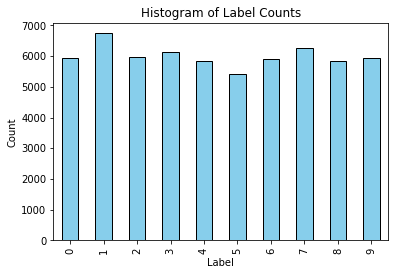

In [179]:
y.plot(kind='bar', color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Histogram of Label Counts')


There are no missing values.

**Q3: Visualize whichever row you like below.**

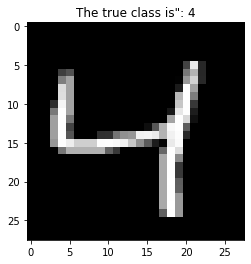

In [35]:
#this answer is provided, nothing to code
instance = 2 #change this freely to see different visualizations
plt.imshow(np.reshape(np.array(train.iloc[instance,1:]), (-1,28)), cmap = 'gray');
plt.title('The true class is": %i' %train.iloc[instance, 0])
plt.show()

**Q4: Train a linear Kernel SVM based classifier (linear SVC) on the training set after standardizing the data appropriately.**

In [36]:
train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
#First standardize
train_X = train.drop(labels='label',axis=1) #predictors of the training set
train_y = train.label #targets (true digits) of the training set
test_X = test.drop(labels='label',axis=1) #predictors of the test set
test_y = test.label #targets (true digits) of the test set
#only standardize the predictors. Keep the code below.
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler(feature_range=(-1,1)).fit(train_X)
train_X = scaling.transform(train_X)
test_X = scaling.transform(test_X)

In [51]:
lin_clf = svm.SVC(kernel='linear') #runs the one-versus-rest approach in multi-class classification by default
#see https://scikit-learn.org/stable/modules/svm.html#multi-class-classification for more details

lin_clf.fit(train_X,train_y)
#fit the lin_clf to the training set

SVC(kernel='linear')

**Q5: Plot the confusion matrix obtained in the training set and report the accuracy.**

In [122]:
pred_train = lin_clf.predict(train_X)#predict the training set

In [185]:
cm_train = confusion_matrix(train_y, pred_train)
cm_train

array([[5913,    0,    2,    0,    0,    2,    0,    0,    6,    0],
       [   1, 6727,    4,    1,    0,    0,    0,    0,    9,    0],
       [   6,   10, 5836,   29,   18,    2,   11,    7,   37,    2],
       [   9,    6,   76, 5890,    0,   77,    0,   12,   51,   10],
       [   2,    8,    6,    1, 5739,    0,    1,    4,    0,   81],
       [  12,   12,   14,  112,   10, 5192,   23,    1,   39,    6],
       [   3,    1,    8,    0,    0,   15, 5890,    0,    1,    0],
       [   2,    2,   22,   11,   21,    2,    0, 6123,    1,   81],
       [  13,   33,   29,   77,    6,   72,    6,    6, 5593,   16],
       [   5,    9,    7,   21,   91,    8,    0,  104,   19, 5685]])

In [124]:
acc_train = accuracy_score(train_y, pred_train)
print(acc_train)

0.9764666666666667


Text(0.5, 1.0, 'Confusion Matrix')

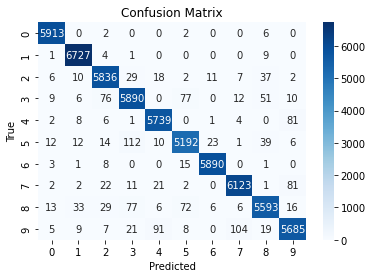

In [186]:

# Plot confusion matrix as a heatmap
sb.heatmap(cm_train, annot=True, fmt='d', cmap='Blues')

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

**Q6: Plot the confusion matrix obtained in the test set and report the accuracy.**

In [128]:
pred_test = lin_clf.predict(test_X) #predict the test set

In [141]:
cm_test = confusion_matrix(test_y, pred_test)
cm_test

array([[ 955,    0,    5,    1,    1,    8,    7,    1,    0,    2],
       [   0, 1118,    5,    3,    0,    1,    1,    1,    6,    0],
       [   7,    9,  961,    8,    4,    6,    9,    8,   17,    3],
       [   4,    1,   14,  954,    1,   14,    2,    5,   13,    2],
       [   1,    1,    8,    0,  940,    2,    7,    1,    2,   20],
       [  12,    5,    4,   42,    5,  785,   13,    2,   20,    4],
       [   8,    2,   11,    1,    6,   18,  909,    0,    3,    0],
       [   3,    8,   23,   13,    8,    1,    0,  951,    3,   18],
       [   7,    4,   10,   31,    8,   25,    7,    5,  870,    7],
       [   6,    7,    4,   13,   31,    4,    1,   21,    9,  913]])

In [130]:
accuracy_score(test_y, pred_test)

0.9356

Text(0.5, 1.0, 'Confusion Matrix')

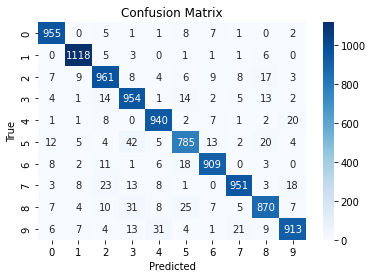

In [187]:

# Plot confusion matrix as a heatmap
sb.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

**Q7: Visualize one test digit which we correctly classified, and another one we misclassified**

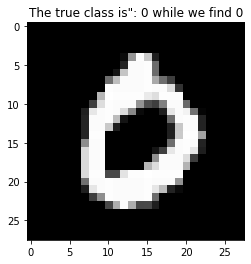

In [131]:
instance = 3 #correct classification
plt.imshow(np.reshape(np.array(test.iloc[instance,1:]), (-1,28)), cmap = 'gray');
plt.title('The true class is": %i while we find %i' % (test_y[instance], pred[instance]))
plt.show()

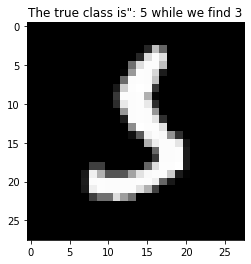

In [132]:
instance = 340 #wrong classification -- well it makes "sense" as it really looks like 7 :)
plt.imshow(np.reshape(np.array(test.iloc[instance,1:]), (-1,28)), cmap = 'gray');
plt.title('The true class is": %i while we find %i' % (test_y[instance], pred[instance]))
plt.show()

**Q8: Find a test digit that is originally 4, but we predicted as 3. Plot this digit. Interpret the result.**

In [154]:
#very simple and non-efficient way of finding the index that satisfies this
for i in range(len(test_y)):
    if test_y[i] == 4 and pred[i] == 3:
        print(i)
        
        

There is no index that is originally 4 and we predicted 3. However for 7, there are multiple indices for which predicted value is 3.

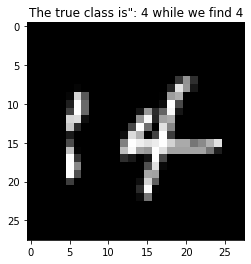

In [155]:
instance = 5676#wrong classification -- well it makes "sense" as it really looks like 7 :)
plt.imshow(np.reshape(np.array(test.iloc[instance,1:]), (-1,28)), cmap = 'gray');
plt.title('The true class is": %i while we find %i' % (test_y[instance], pred[instance]))
plt.show()
#Answer: we can see that there are two disconnected shapes

**Q9: Try the radial Kernel in your SVM classification. Keep the other parameters default.**

In [139]:
clf = svm.SVC(kernel='rbf') #runs the one-versus-one approach in multi-class classification
clf.fit(train_X,train_y) # fit clf to the training set (i.e., training stage)

SVC()

**Q10: Visualize the test-set confusion matrix and report the test accuracy of this model.**

In [148]:
pred = clf.predict(test_X)#use "predict" function of scikit's svm library

In [188]:
cm = confusion_matrix(test_y, pred)
cm

array([[ 973,    0,    1,    0,    0,    2,    1,    1,    2,    0],
       [   0, 1126,    3,    1,    0,    1,    1,    1,    2,    0],
       [   6,    1, 1006,    2,    1,    0,    2,    7,    6,    1],
       [   0,    0,    2,  994,    0,    3,    0,    5,    5,    1],
       [   0,    0,    5,    0,  961,    0,    3,    0,    2,   11],
       [   2,    0,    0,    9,    0,  871,    4,    1,    4,    1],
       [   6,    2,    0,    0,    2,    3,  944,    0,    1,    0],
       [   0,    6,   11,    1,    1,    0,    0,  996,    2,   11],
       [   3,    0,    2,    6,    3,    2,    2,    3,  950,    3],
       [   3,    4,    1,    7,   10,    2,    1,    7,    4,  970]])

In [149]:
accuracy_score(test_y, pred)

0.9791

Text(0.5, 1.0, 'Confusion Matrix')

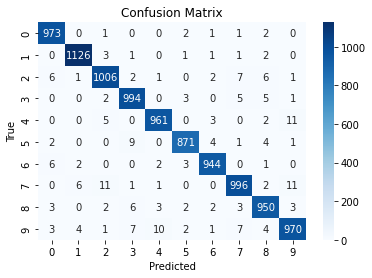

In [189]:

# Plot confusion matrix as a heatmap
sb.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

**Q11: Discuss whether the linear or radial Kernel gives better results.**

- Answer: Radial kernel has better accuracy!

**(Optional question): By using cross-validation, compare SVCs with different Kernels, parameters, as well as one-versus-one approach. Report the test error of the model picked.**

Note that, if you implemented correctly, you will already have close to 98% test set accuracy via simplest forms of SVMs. Hence, it will be an interesting task for you to tune additional parameters via cross-validation, and to see if the test performance can be improved even further.